In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv("../Data/HR-Employee-Attrition.csv")


In [3]:
# Show the first rows
display(df.head())

# Show the last rows
display(df.tail())

# Show a random sample of 5 rows
display(df.sample())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
120,30,No,Travel_Frequently,1312,Research & Development,23,3,Life Sciences,1,159,...,3,80,3,10,2,2,10,7,0,9


In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.shape

(1470, 35)

In [6]:
# Overview of column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
display(df.describe(include='all'))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


### Visual inspection of the data

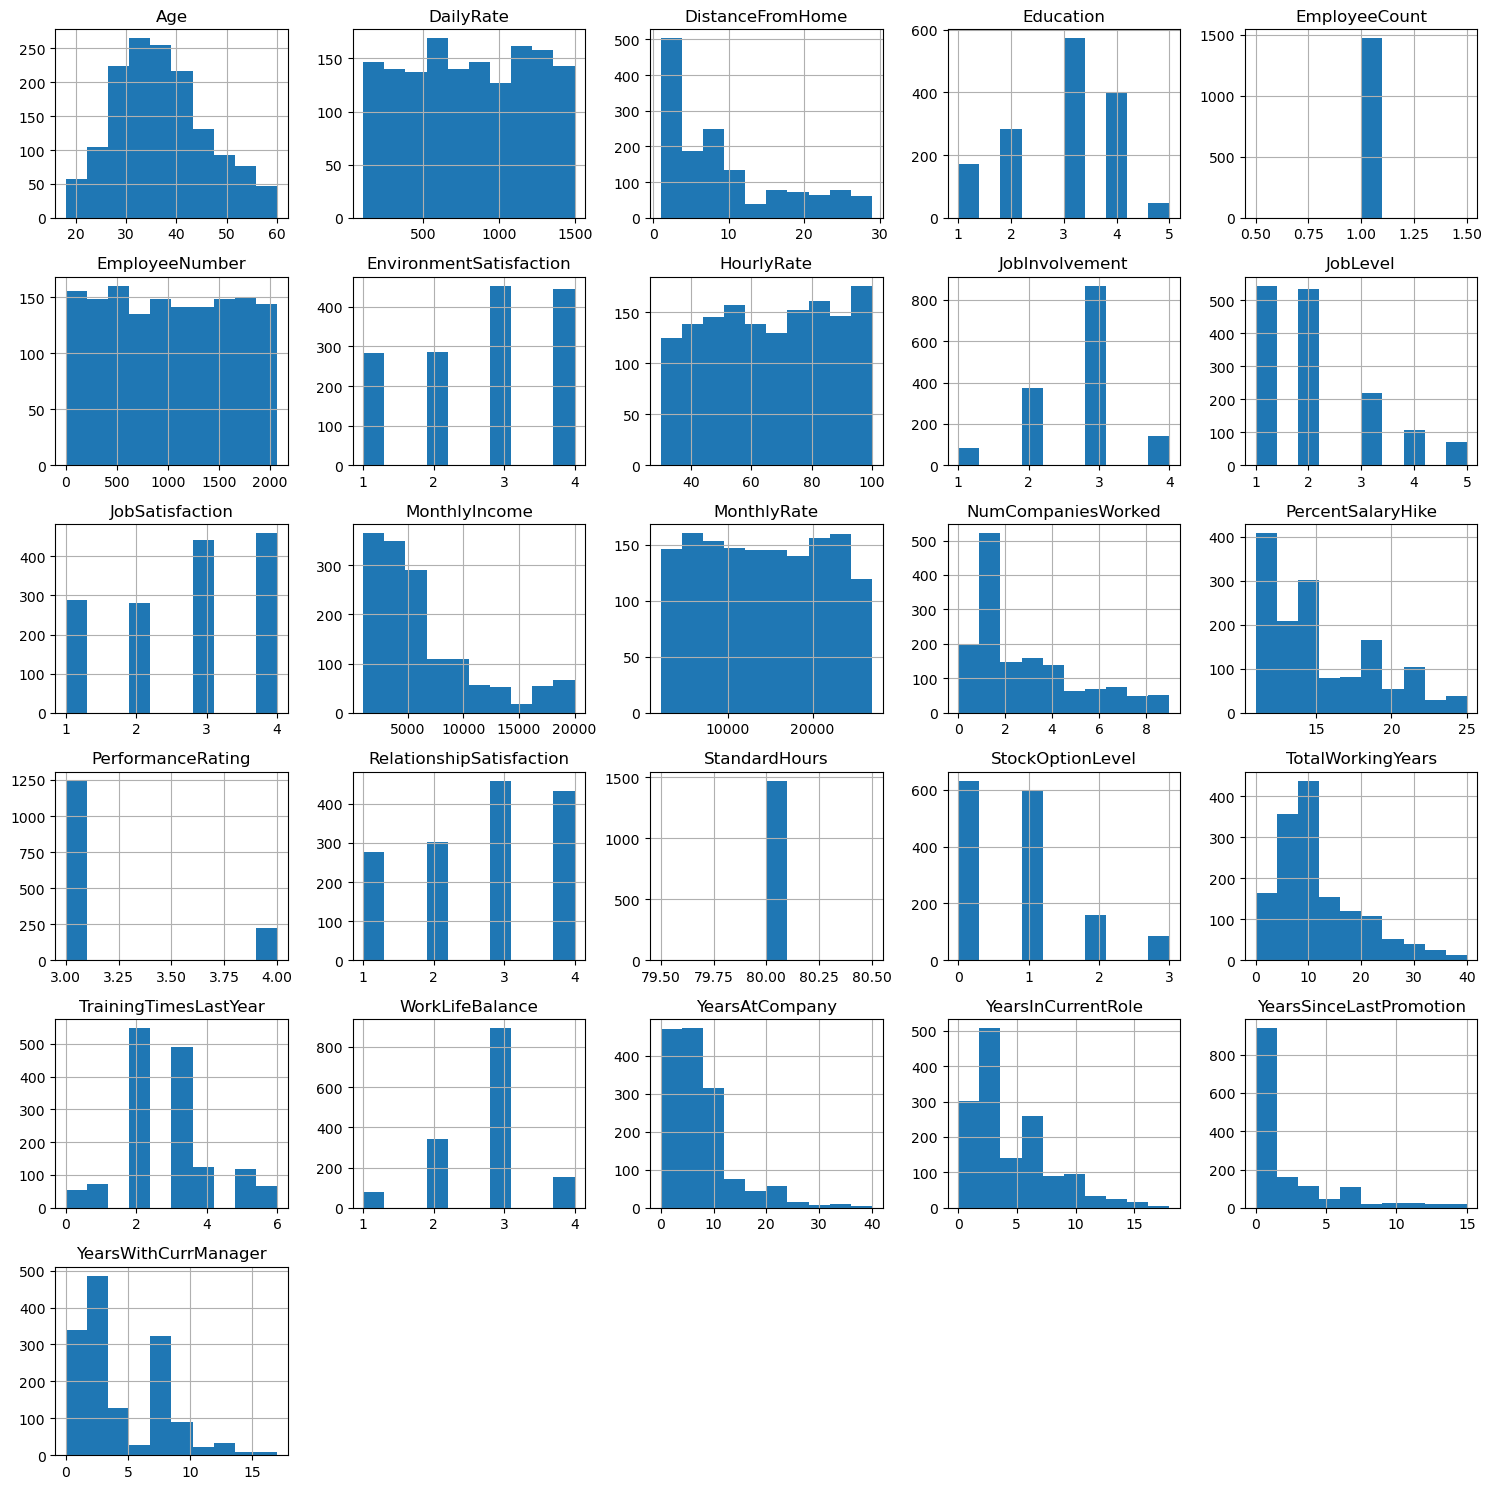

In [8]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

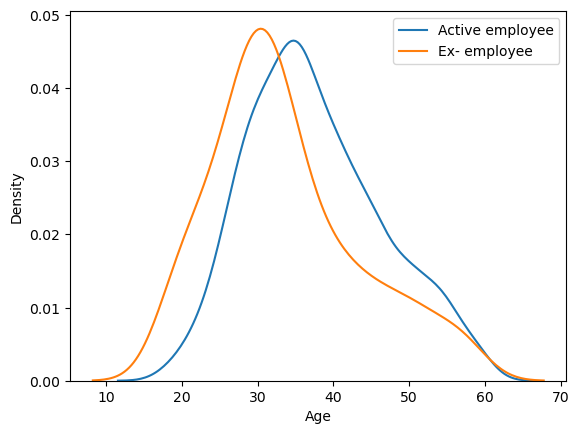

In [9]:
sns.kdeplot(df.loc[df['Attrition'] =='No','Age'],label='Active employee')
sns.kdeplot (df.loc[df['Attrition'] =='Yes','Age'],label='Ex- employee')
plt.legend() 
plt.show() 

<Axes: title={'center': 'Count of  gender'}, xlabel='Gender'>

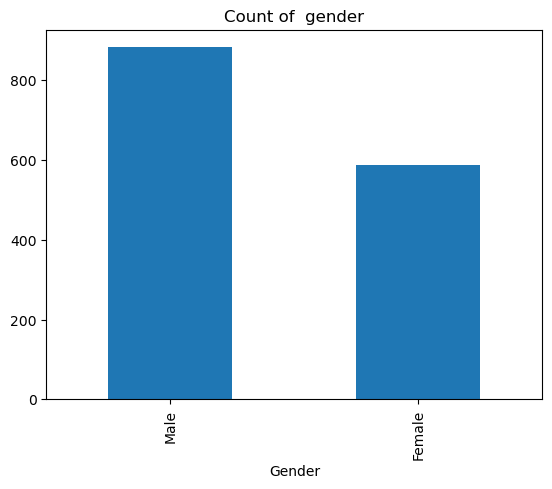

In [10]:
df['Gender'].value_counts().plot(kind='bar',title="Count of  gender")

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

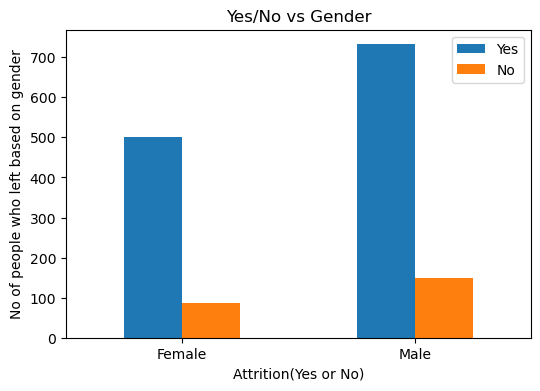

In [11]:
#Employeee attrition (stay or leaving) in comapny based on the their genders 
pd.crosstab(df['Gender'],df['Attrition']).plot(kind="bar",figsize=(6,4))
plt.title("Yes/No vs Gender")
plt.xlabel("Attrition(Yes or No)")
plt.ylabel("No of people who left based on gender")
plt.legend(["Yes","No"])
plt.xticks(rotation=0)

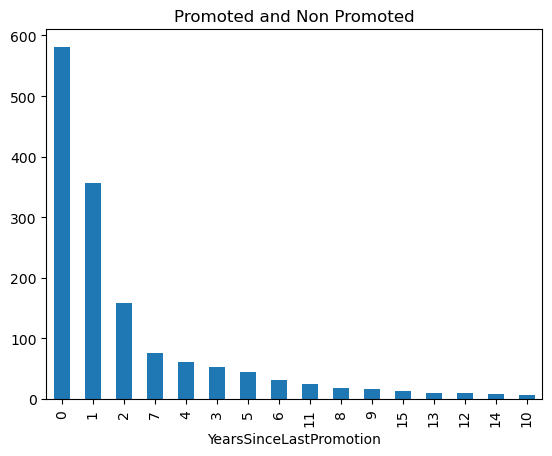

In [12]:
df['YearsSinceLastPromotion'].value_counts().plot(kind='bar',title="Promoted and Non Promoted")
plt.show()

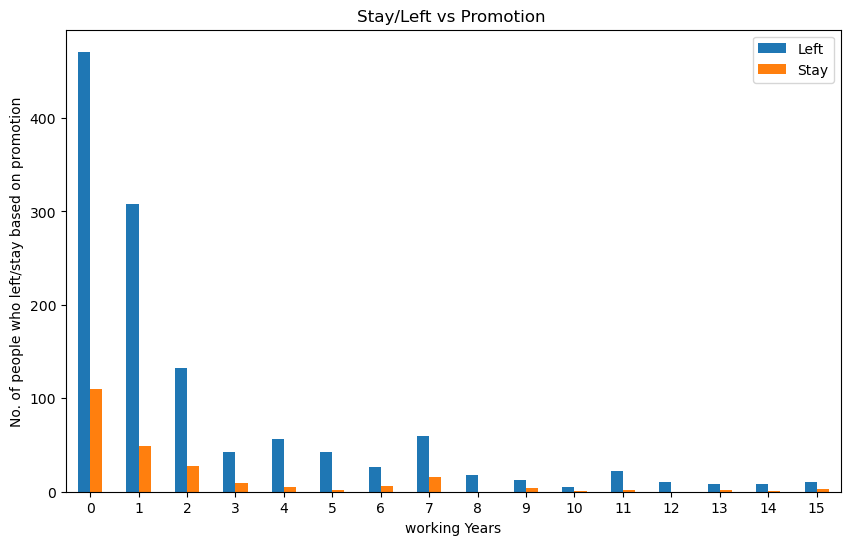

In [13]:
#Employee Attrition based on their promotions 
pd.crosstab(df['YearsSinceLastPromotion'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Promotion ")
plt.xlabel("working Years")
plt.ylabel("No. of people who left/stay based on promotion")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)
plt.show()


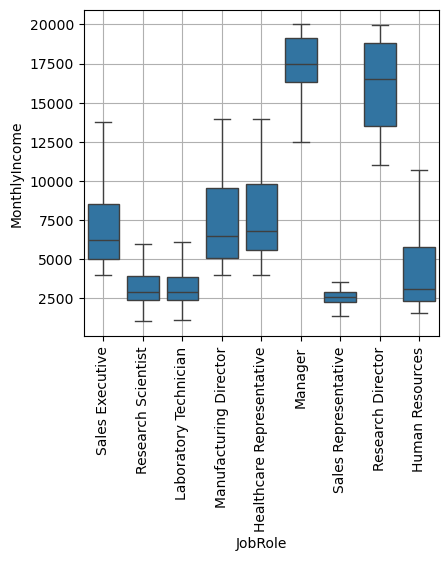

In [14]:
plt.figure(figsize=(5, 4))
sns.boxplot(y=df["MonthlyIncome"], x=df["JobRole"],showfliers=False)
plt.grid(True, alpha=1)
plt.tight_layout()
plt.xticks(rotation='vertical')


plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_5576\3470071800.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', title='Attrition')


<Figure size 600x400 with 0 Axes>

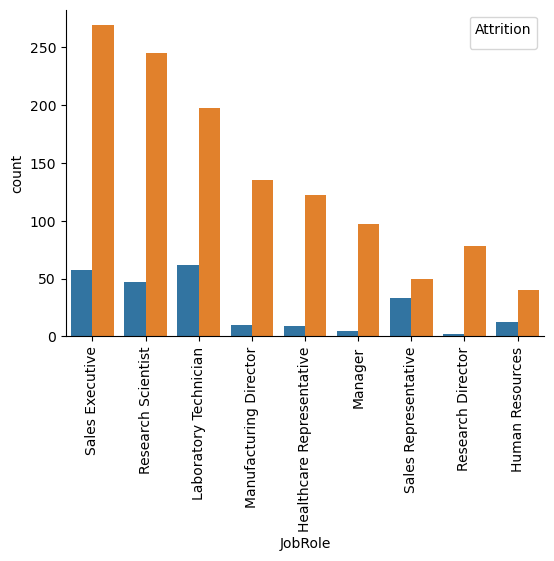

In [15]:
plt.figure(figsize=(6, 4))  # Set the figure size to 6 inches wide and 4 inches tall
sns.catplot(x='JobRole', hue='Attrition', data=df, kind="count", height=4, aspect=1.5, legend=False)
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

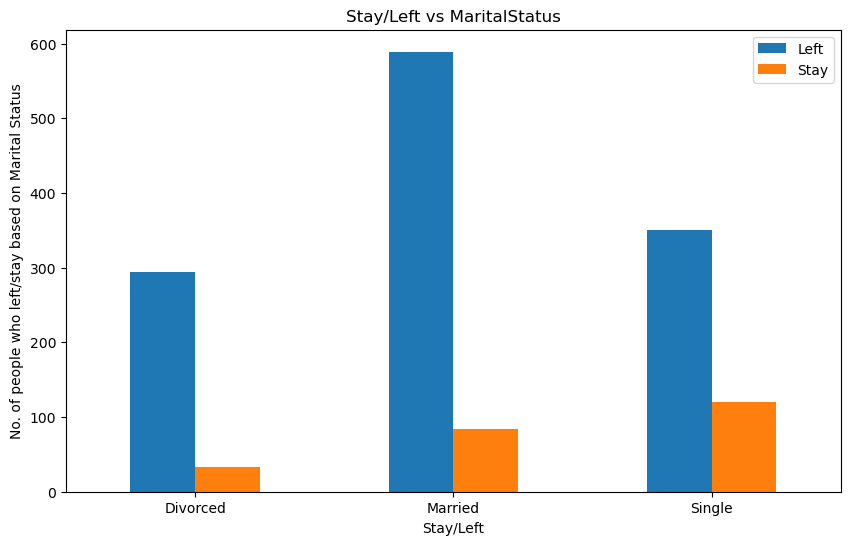

In [16]:
# #Employee Attrition based on their Marial Status
pd.crosstab(df['MaritalStatus'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs MaritalStatus")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on Marital Status")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)
plt.show()

In [17]:
# Convert target variable to binary
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})


In [18]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]
X = pd.get_dummies(X, drop_first=True)

In [19]:
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(exclude="object").columns


In [20]:
encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [21]:
#  Now we Split the data into Training set and Testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
import pandas as pd


Accuracy: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [24]:
import os

# ensure output directory exists
os.makedirs("model", exist_ok=True)

models = {
    "random_forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "logistic_regression": LogisticRegression(max_iter=1000)
}

# Train & save models
for name, model in models.items():
    model.fit(X_train, y_train)
    joblib.dump(model, f"model/{name}.pkl")

# Save preprocessing objects
joblib.dump(scaler, "model/scaler.pkl")
# save the encoders dictionary (not the single LabelEncoder variable)
joblib.dump(encoder, "model/encoders.pkl")

print("Models and preprocessing saved successfully.")

Models and preprocessing saved successfully.


In [25]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Here we Train the Model
    y_pred = model.predict(X_test) #Now we Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')
    

In [26]:
#Function to plot Confusion Matrix after calculation of each model 
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

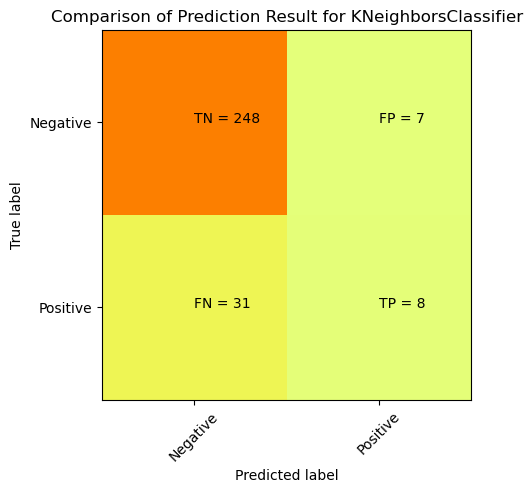

Accuracy of the Model KNeighborsClassifier 87.1%


In [27]:
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

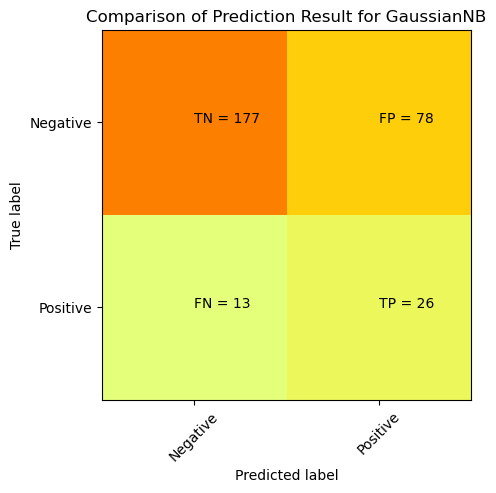

Accuracy of the Model GaussianNB 69.0%


In [28]:
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

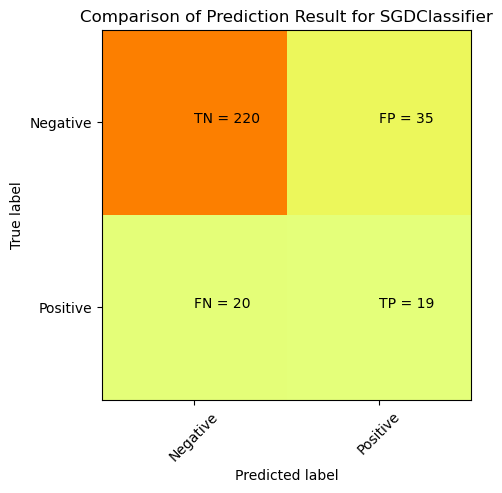

Accuracy of the Model SGDClassifier 81.3%


In [29]:
Model = "SGDClassifier"
model=SGDClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

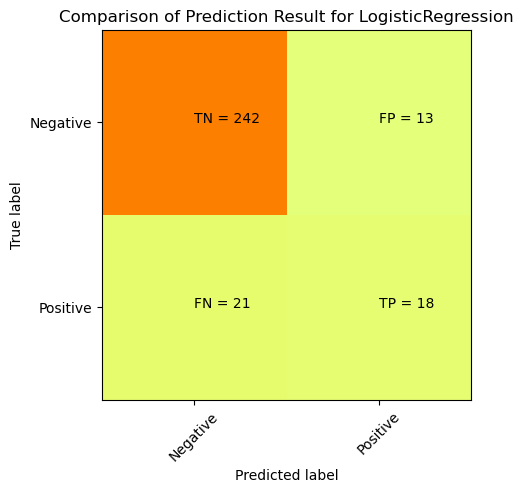

Accuracy of the Model LogisticRegression 88.4%


In [30]:
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

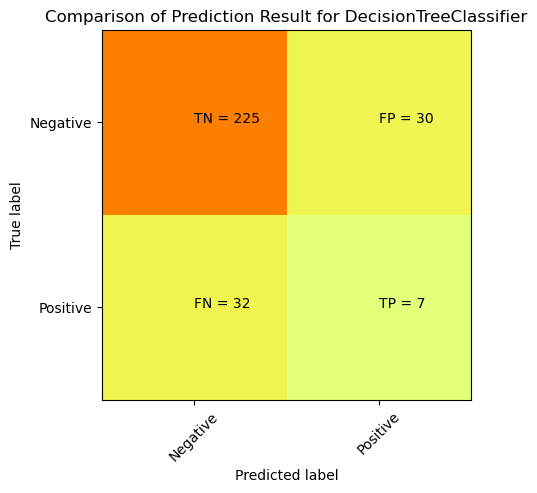

Accuracy of the Model DecisionTreeClassifier 78.9%


In [31]:
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

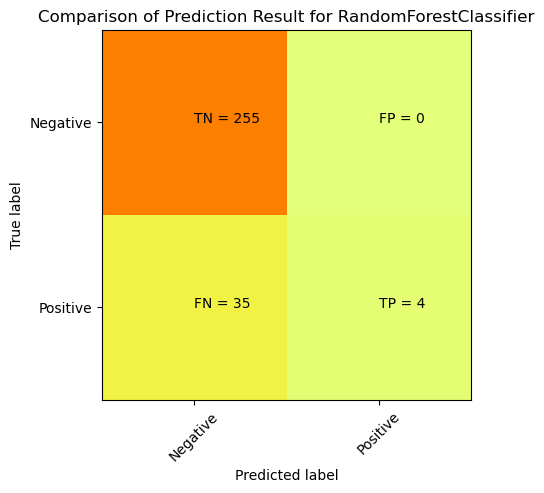

Accuracy of the Model RandomForestClassifier 88.1%


In [32]:
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

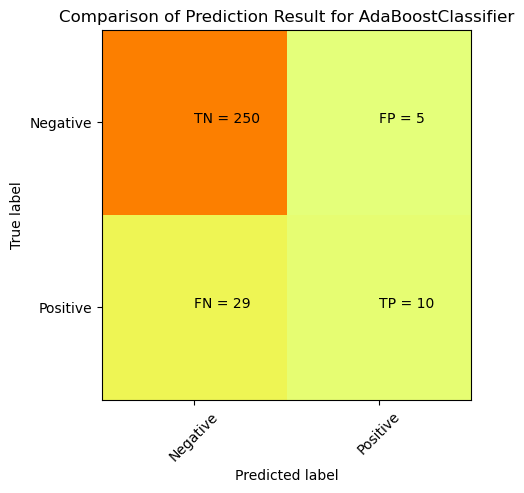

Accuracy of the Model AdaBoostClassifier 88.4%


In [33]:
Model = "AdaBoostClassifier"
model=AdaBoostClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

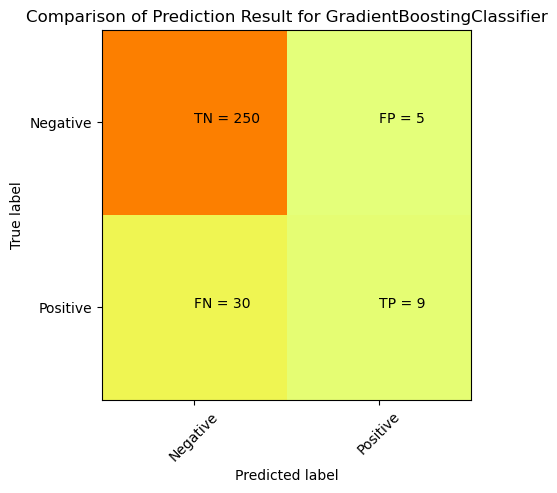

Accuracy of the Model GradientBoostingClassifier 88.1%


In [34]:
Model = "GradientBoostingClassifier"
model=GradientBoostingClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

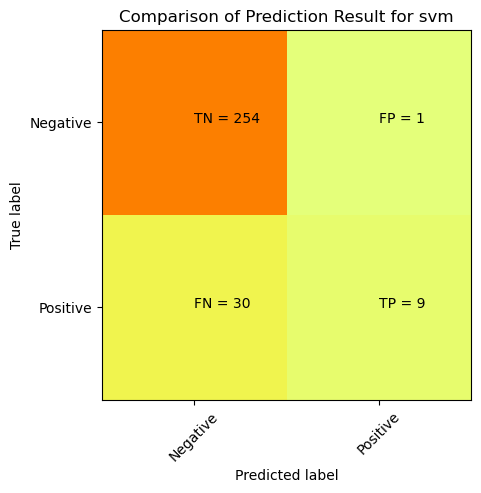

Accuracy of the Model svm 89.5%


In [35]:
Model = "svm"
model=SVC()

train_test_ml_model(X_train,y_train,X_test,Model)

In [36]:
lg=LogisticRegression()
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier()
svm = SVC()
SGD= SGDClassifier()
Ada= AdaBoostClassifier()
GD= GradientBoostingClassifier()


In [37]:
def train_test_ml_model(X_train, y_train, X_test, model, model_name):
    model.fit(X_train, y_train)
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_prediction)
    test_accuracy = accuracy_score(y_test, test_prediction)
    
    msg1 = f"[{model_name}] training data accuracy is: {train_accuracy}"
    msg2 = f"[{model_name}] test data accuracy is: {test_accuracy}"
    print(msg1)
    print(msg2)
  

models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), SVC(), RandomForestClassifier(), GaussianNB(),SGDClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
model_names = ["Logistic Regression", "Decision Tree", "KNN", "SVM", "Random Forest", "Naive Bayes","SGD","Ada","GD"]

for model, name in zip(models, model_names):
    train_test_ml_model(X_train, y_train, X_test, model, name)
    print()


[Logistic Regression] training data accuracy is: 0.8903061224489796
[Logistic Regression] test data accuracy is: 0.8843537414965986

[Decision Tree] training data accuracy is: 1.0
[Decision Tree] test data accuracy is: 0.7585034013605442

[KNN] training data accuracy is: 0.8571428571428571
[KNN] test data accuracy is: 0.8707482993197279

[SVM] training data accuracy is: 0.9200680272108843
[SVM] test data accuracy is: 0.8945578231292517

[Random Forest] training data accuracy is: 1.0
[Random Forest] test data accuracy is: 0.8775510204081632

[Naive Bayes] training data accuracy is: 0.6811224489795918
[Naive Bayes] test data accuracy is: 0.6904761904761905

[SGD] training data accuracy is: 0.8418367346938775
[SGD] test data accuracy is: 0.8231292517006803

[Ada] training data accuracy is: 0.8945578231292517
[Ada] test data accuracy is: 0.8843537414965986

[GD] training data accuracy is: 0.9625850340136054
[GD] test data accuracy is: 0.8809523809523809



In [38]:
model_scores = {
    'Logistic Regression': models[0].score(X_test, y_test),
    'Decision Tree': models[1].score(X_test, y_test),
    'KNN Classifier': models[2].score(X_test, y_test),
    'SVM': models[3].score(X_test, y_test),
    'Random Forest': models[4].score(X_test, y_test),
    'Naive Bayes': models[5].score(X_test, y_test),
    'SGD': models[6].score(X_test, y_test),
    'AdaBoost': models[7].score(X_test, y_test),
    'GradientBoosting': models[8].score(X_test, y_test)
}

for model, score in model_scores.items():
    print(f"{model} score: {score}")


Logistic Regression score: 0.8843537414965986
Decision Tree score: 0.7585034013605442
KNN Classifier score: 0.8707482993197279
SVM score: 0.8945578231292517
Random Forest score: 0.8775510204081632
Naive Bayes score: 0.6904761904761905
SGD score: 0.8231292517006803
AdaBoost score: 0.8843537414965986
GradientBoosting score: 0.8809523809523809


In [39]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
print(model_compare)


          Logistic Regression  Decision Tree  KNN Classifier       SVM  \
accuracy             0.884354       0.758503        0.870748  0.894558   

          Random Forest  Naive Bayes       SGD  AdaBoost  GradientBoosting  
accuracy       0.877551     0.690476  0.823129  0.884354          0.880952  


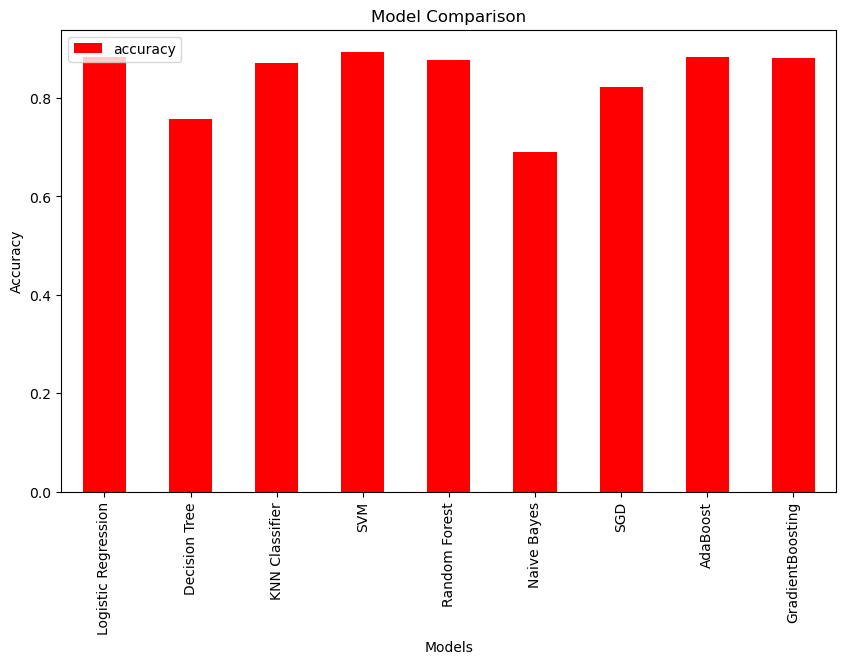

In [40]:


model_compare.T.plot(kind='bar',color=['red'],figsize=(10,6))


# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')

# Display the plot
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_5576\2038767994.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


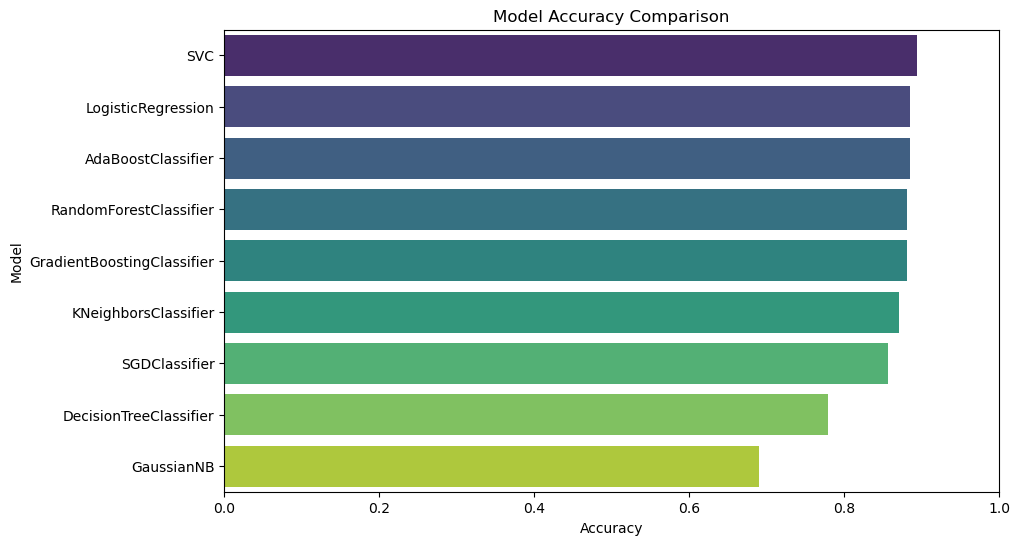

In [41]:
models = {
    "SVC": SVC(),
    "GaussianNB": GaussianNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SGDClassifier": SGDClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()
